In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#load the dataset
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
#drop unnecessary features
useless = ['PassengerId','Name','Ticket', 'Cabin']
testIds = df_test[['PassengerId']]
df_train = df_train.drop(useless, axis = 1)
df_test = df_test.drop(useless, axis = 1)

In [7]:
# Encode the values
labelEncoder = LabelEncoder()

#fill missing values

#Embarked
df_train['Embarked'] = df_train['Embarked'].fillna('C')  #Cherbourg
df_test['Embarked'] = df_train['Embarked'].fillna('C')

df_train['Embarked'] = labelEncoder.fit_transform(df_train['Embarked'])
df_test['Embarked'] = labelEncoder.fit_transform(df_test['Embarked'])

#Sex
df_train['Sex'] = pd.get_dummies(df_train['Sex'], drop_first = True)
df_test['Sex'] = pd.get_dummies(df_test['Sex'], drop_first = True)

print("Training Dataset Missing values:\n", df_train.isnull().sum(), "\nTesting Dataset Missing Values: \n", df_test.isnull().sum())

Training Dataset Missing values:
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64 
Testing Dataset Missing Values: 
 Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


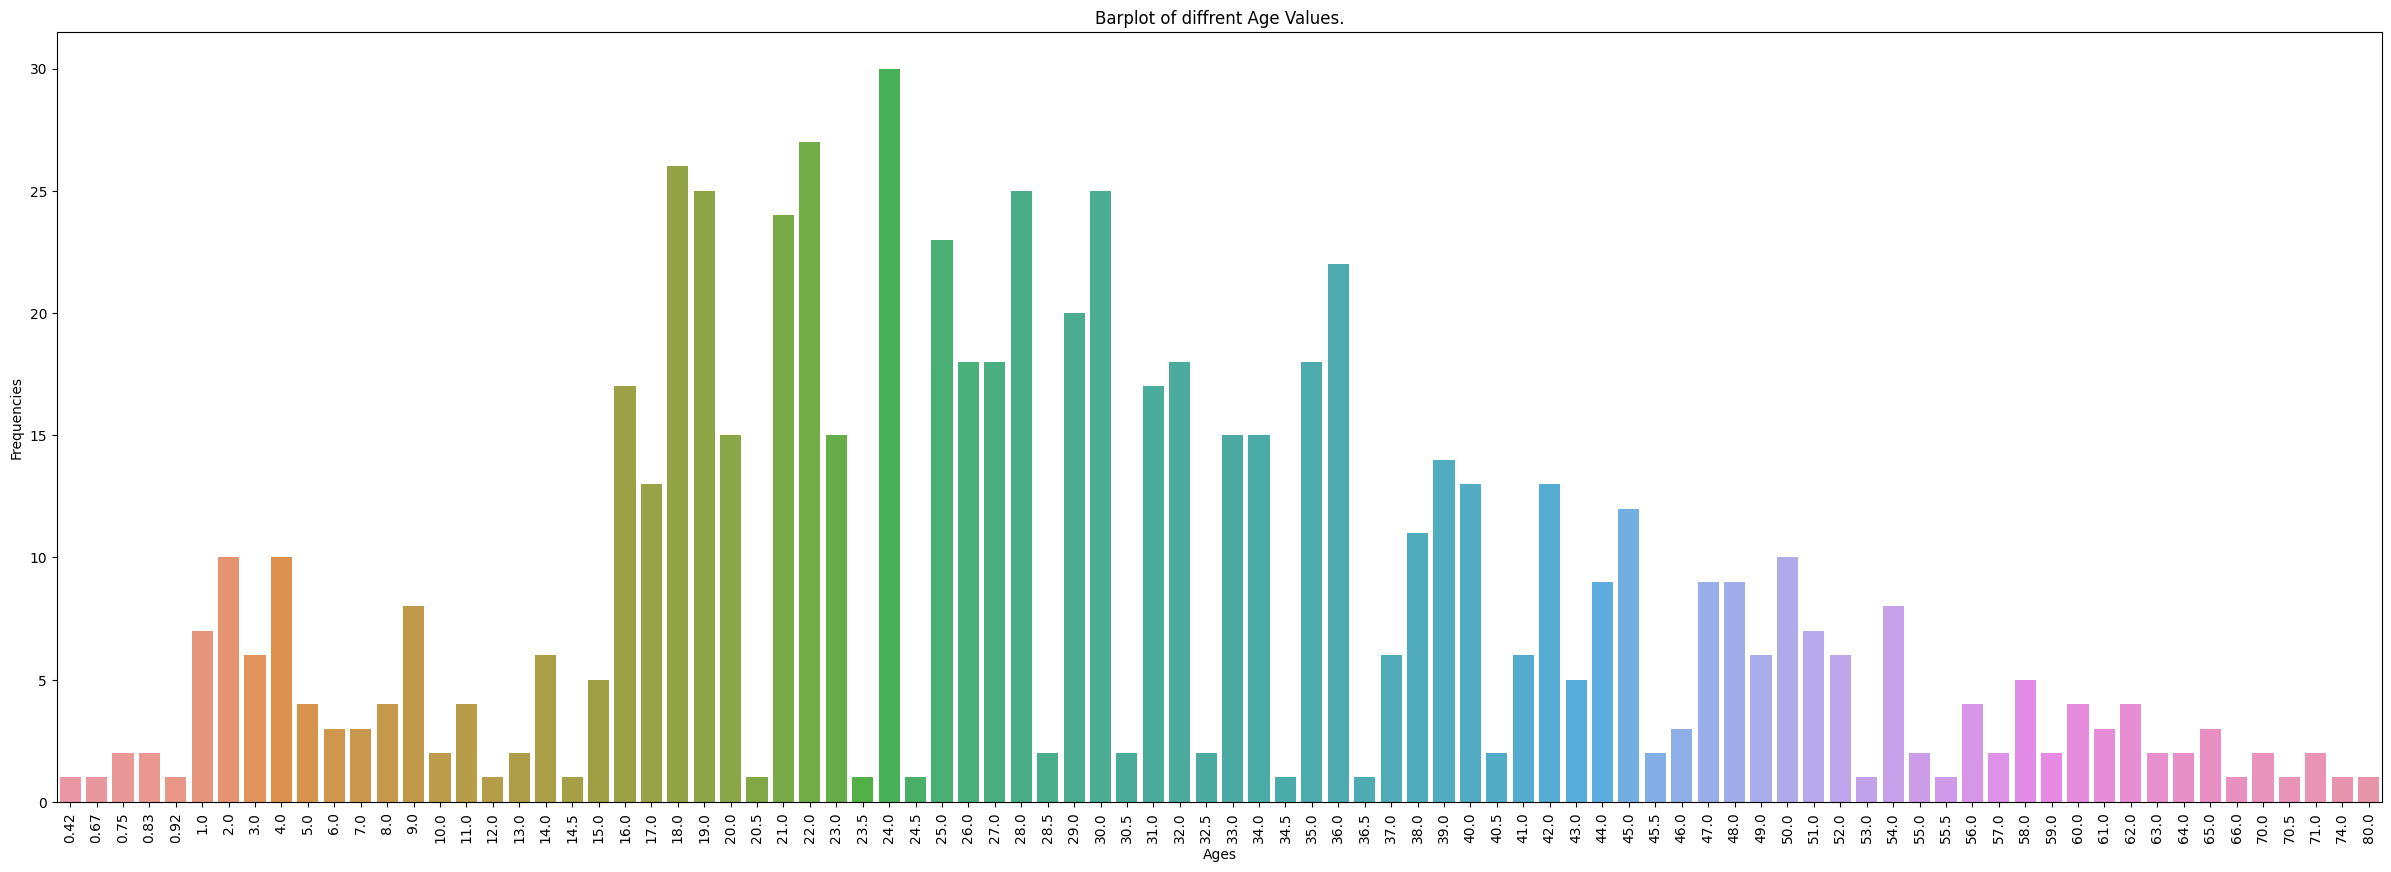

In [8]:
#barplot of frequencies of age present
age_frequencies = df_train['Age'].value_counts().sort_index()

plt.figure(figsize = (30, 10))

sns.barplot(x = age_frequencies.index, y = age_frequencies.values)
plt.xlabel('Ages')
plt.ylabel('Frequencies')
plt.title("Barplot of diffrent Age Values.")
plt.xticks(rotation = 90)
plt.show()

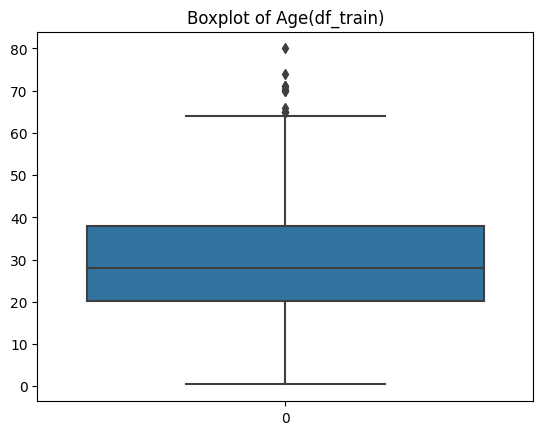

In [9]:
#Plotting 'Age' from df_train
sns.boxplot(df_train['Age'])
plt.title("Boxplot of Age(df_train)")
plt.show()

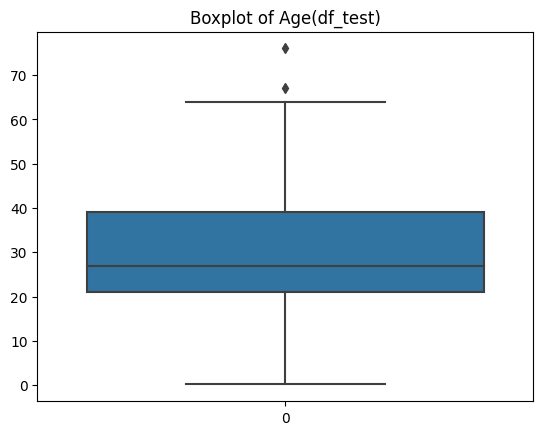

In [10]:
#plotting 'Age' from df_test
sns.boxplot(df_test['Age'])
plt.title("Boxplot of Age(df_test)")
plt.show()

In [11]:
# #Remove the outliers from age(complete rows) => Training Data
# Q1_train = df_train['Age'].quantile(0.25)
# Q3_train = df_train['Age'].quantile(0.75)

# #Inter-Quarile Range
# IQR_train = Q3_train - Q1_train

# #Outlier bounds
# lower_bound_train = Q1_train - 1.5 * IQR_train
# upper_bound_train = Q3_train + 1.5 * IQR_train

# #Median Age
# median = df_train['Age'].median()

# #Keep only those data where 'Age' is not an outlier
# df_train.loc[(df_train['Age'] < lower_bound_train) & (df_train['Age'] > upper_bound_train), 'Age'] = median
# df_train.reset_index(drop = True, inplace = True)
# df_train

In [12]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [13]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [14]:
# #Remove outliers from test set and use median strategy to fill missing vals then
# Q1_test = df_test['Age'].quantile(0.25)
# Q3_test = df_test['Age'].quantile(0.75)

# #Inter Quartile Range
# IQR_test = Q3_test - Q1_test

# lower_bound_test = Q1_test - 1.5 * IQR_test
# upper_bound_test = Q3_test + 1.5 * IQR_test

# #get median of 'Age' values
# median_age = df_test['Age'].median()

# #Replace age vals in testset with median
# df_test.loc[(df_test['Age'] < lower_bound_test) | (df_test['Age'] > upper_bound_test), 'Age'] = median_age
# df_test

In [15]:
#Impute the test Dataset

#Age
df_train['Age'].fillna(df_test['Age'].mean(), inplace = True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace = True)

#Fare
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)

df_test.isnull().sum()

/tmp/ipykernel_13/3497351021.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_test['Age'].mean(), inplace = True)
/tmp/ipykernel_13/3497351021.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
#Seperate the trainData
Y = df_train['Survived']
X = df_train.drop(['Survived','SibSp','Parch'], axis = 1)

In [17]:
#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 42
                                                   )

In [18]:
#Start the Classification and Model Training
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, Y_train)

preds = model.predict(X_test)

print(f"Classification Report:\n {classification_report(Y_test, preds)}")
print(f"Confusion Matrix: {confusion_matrix(Y_test, preds)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       157
           1       0.70      0.50      0.58       111

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.70      0.70      0.69       268

Confusion Matrix: [[133  24]
 [ 56  55]]


In [19]:
#Seperate the testdata
T = df_test.drop(['SibSp','Parch'], axis = 1)

In [20]:
#Final Complete fit
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'uniform',
    metric = 'minkowski',
    p = 2,
    algorithm = 'auto'
)

model.fit(X, Y)

preds = model.predict(T)
print(preds)

[0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 1]


In [21]:
#generate the submission
output = pd.DataFrame({'PassengerId':testIds.PassengerId, 'Survived': preds})

output.to_csv('submission.csv', index = False)